# Week 5: Euler/Verlet

## Library Imports Go Here

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Basic Euler Method

### Building the Algorithm

<font color = blue>
    
Construct an algorithm that implements the basic Euler method to solve the first order differential equation

$$
\frac{dx}{dt} = F((x(t), t)
$$

It should take as inputs the `function` ($F$, assumed to be of two variables), the initial value `x_initial`, the step size `time_step`, and the total number of steps`step_count` = $N$.  It should output two arrays of $N+1$ elements, the first of which is of the form $\{t_n\}$ with first element $0$, and the second of which is of the form $\{x_n\}$, with first element $x_0$ = `x_initial`.

In [374]:
def euler_method(function, x_initial, time_step, step_count):
    """
    Implementation of the basic euler method to solve ODE
    function : the function we are trying to solve (2 variables)
    x_initial : initial value of x
    time_step : the size of each step
    step_count : the total number of steps we are taking
    returns : step_count + 1 long array of time values and x values
    """
    function_initial = function(x_initial, 0)
    x_time_values = [[0, [0] * len(x_initial)] for _ in range(step_count + 1)]
    x_i = x_initial
    function_i = function_initial
    for i in range(step_count):
        x_i = x_i + (np.array([item * time_step for item in function_i]))
        function_i = function(x_i, (i + 1) * time_step)
        x_time_values[i + 1] = [(i + 1) * time_step, x_i]
    return x_time_values

### Initial Testing

<font color = blue>
Consider the differential equation

$$
\frac{dx}{dt} = -x \, , \hspace{.75in} x(0) = 10 \, .
$$


<font color = blue>
    
Use your Euler method function to find the solution to this differential equation, using a step size of 0.01 and working out to 1000 steps.  Plot your results.  (In order to do this, you will first need to create the `function` $F(x, t)$ that defines the differential equation.)


Then, as a **discussion**, find the analytic solution to the differential equation.  Include that solution on the graph you create, and confirm that (at least visually) the analytic and numerical solutions are in good agreement.

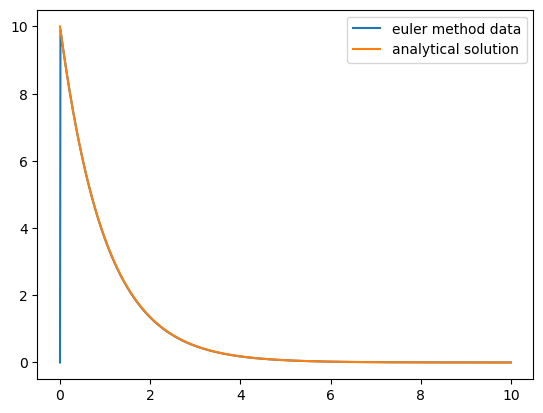

In [378]:
def test_diff_eq(x, t):
    """
    Test differential equation for euler method function
    x : position variable
    t : time variable
    """
    return -x

points = euler_method(test_diff_eq, np.array([10]), .01, 1000)

# extract x and t values
t_vals = [point[0] for point in points]
x_vals = [point[1] for point in points]


## analytical solution data generation
soln_x_val = np.zeros(1001)
soln_t_val = np.zeros(1001)
for i in range(1001):
    soln_t_val[i] = i * .01
    soln_x_val[i] = 10 * np.exp(-soln_t_val[i])

plt.plot(t_vals, x_vals, label="euler method data")
plt.plot(soln_t_val, soln_x_val, label="analytical solution")
plt.legend()

When computing the analytical solution to this differential equation we get $x(t) = 10e^{-t}$ which we can see (graphically) is in good agreement with the data from the euler method

### Examining Global Error

<font color = blue>
    
Next we want to examine "global error" (the accumulated discrepancy between an analytic result and a numerical one after a large number of steps are taken to extrapolate to some particular time $T$).

To do so, we will use the (analytically solvable) differential equation

$$
\frac{dx}{dt} = t, \hspace{.5in} x(0) = 0 \, .
$$

and compare the analytic solution to the numerical solution at time $T$.

the numerical solution at time T is [49.95] while the analytical solution is 50.0


Text(0, 0.5, 'x(t)')

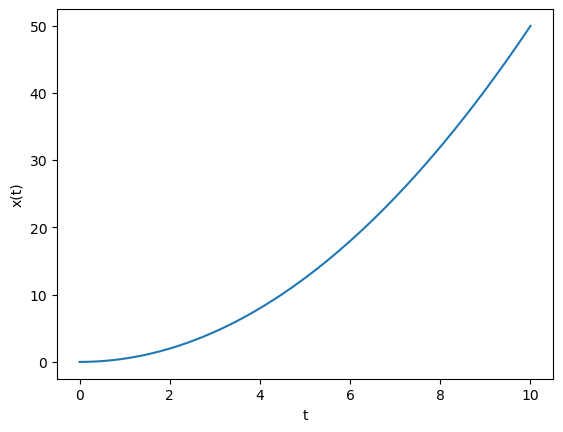

In [382]:
def second_test_diff_eq(x, t):
    """
    Second Test differential equation for euler method function
    x : position variable
    t : time variable
    """
    return np.array([t])

points2 = euler_method(second_test_diff_eq, np.array([0]), .01, 1000)
t_vals_2 = [point[0] for point in points2]
x_vals_2 = [point[1] for point in points2]

print(f"the numerical solution at time T is {points2[1000][1]} while the analytical solution is {(1000*.01)**2/2}")
plt.plot(t_vals_2, x_vals_2)
plt.xlabel("t")
plt.ylabel("x(t)")

#### Analytic Work -- Discussion Section

<font color = blue>

What makes this a particularly good test case is that not only can the differential equation be solved exactly, it is also possible to write down analytically what the Euler method solution will give, which means we can make a prediction for what the global error should be.

First, solve the differential equation analytically, to find $x(t)$.

Then, using the Euler rule, (still analytically) determine $x_N$, the position Euler will give after $N$ steps of size $\Delta t$.  

Then, work out the discrepancy $\delta = x(t_N) - x_{N}$ after $N$ steps, and rewrite this in terms of $T$ (the time you are at after $N$ steps) and $\Delta t$.

solving the differential equation analytically to find x(t) we get $x(t) = \frac{t^2}{2}$. Solving Eulers rule for this equation we get that after N steps of size $\Delta T$ we get $x_N = \sum_{n=1}^{N} t_n * \Delta t$. $\delta = 50 - (\Delta t * \sum_{n=1}^{N} t_n) = 50 - (\Delta t * 10.01 * 500) = 50 - 50.05 = .05$ 

#### Numerical Work and Comparison

<font color = blue>

Now we want to confirm this prediction, using $T = 1$.  Create a function that takes as its input just `step_count`, and outputs the magnitude of the discrepancy $\delta$ between the analytic solution $x(1)$ and the numerical approximation to it (using your Euler code).  Use this to generate data for $\Delta t$ vs. $\delta$ with $N$ in the range $[10, 1000]$ and then plot the results.  In a **discussion**, assess the results.  Are they consistent with the expected global error behavior?

Text(0.5, 1.0, 'Delta t vs. delta (discrepancy)')

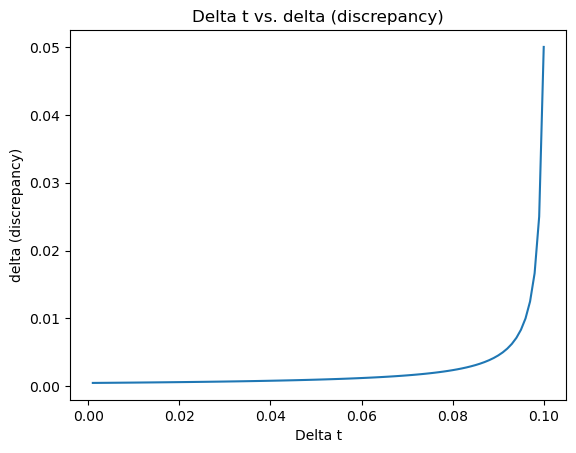

In [388]:
def comparing_diff_N(step_count):
    """
    function that outputs discrepancy delta between analytic soln x(1) and numerical
    approximation.

    step_count : total steps (N) that we are taking in our approximation

    returns : delta representing discrepancy between analytical and numerical solutions
    """
    step_size = 1 / step_count
    # find the sum of t values:
    sum_of_t = 0
    for i in range(step_count):
        sum_of_t += (i + 1) * step_size
    return abs(1/2 - (step_size * sum_of_t))

delta_for_diff_N = np.zeros(100)
for i in range(100):
    N = (i + 1) * 10
    delta_for_diff_N[i] = comparing_diff_N(N)

delta_t = np.linspace(1/1000, 1/10, 100)
delta_t = delta_t[::-1] # reverse the order of the array so that N, delta_t pairs make sense
plt.plot(delta_t, delta_for_diff_N)
plt.xlabel("Delta t")
plt.ylabel("delta (discrepancy)")
plt.title("Delta t vs. delta (discrepancy)")

This makes sense when thinking about what the global error should be. I know that this makes sense because the global error scales with $\Delta t$ by $T\Delta t$ therefore when this value increases so does the global error (as we see in the graph above)

## Instability in the Euler Method

### Euler for a Second Order Differential Equation

<font color = blue>
Use the Euler algorithm to find a numerical solution to the second order differential equation

$$
\frac{d^2x}{dt^2} = -4\pi^2 x \, ,
$$

with the initial conditions $x_0 = 1$, $v_0 = 0$.  Set the time step size to be $0.01$, and take 500 steps.  

Depending slightly on the details of how your essential Euler function was written, you should be able to use that code here to solve this *second order* differential equation!

Find the analytic solution with these initial conditions as well (as a **discussion**), and plot the two together.

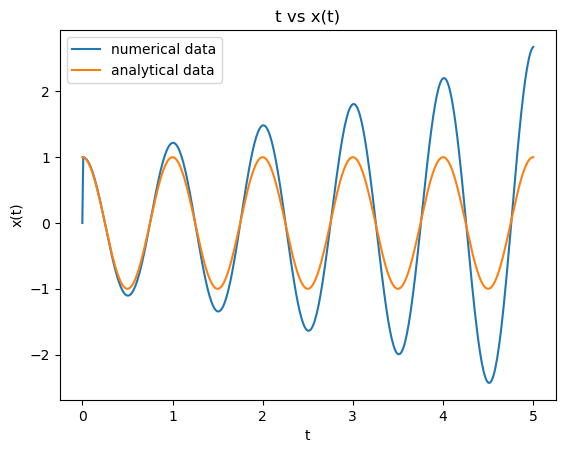

In [393]:
def second_order_test_func(f, t):
    """
    Second order Test differential equation for euler method function
    f : vector (x, v)
    t : time variable
    """
    return [f[1], -4 * np.pi**2 * f[0]]

points3 = euler_method(second_order_test_func, np.array([1, 0]), .01, 500)
t_vals_3 = [point[0] for point in points3]
f_vals = [point[1][0] for point in points3]

## generating data for analytical solution f(t) = cos(2pit)
soln_f_val = np.zeros(501)
for i in range(501):
    soln_f_val[i] = np.cos(2 * np.pi * t_vals_3[i])
    
plt.plot(t_vals_3, f_vals, label = "numerical data")
plt.plot(t_vals_3, soln_f_val, label = "analytical data")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("t vs x(t)")
plt.legend()

When finding the analytical solution to the second order partial derivative I found it to be $x(t) = 2cos(2\pi t)$. When looking at the graph of the two position functions next to eachother we can see that our numerical data exhibits exponential growth (amplitude). This perfectly aligns with what we found the errors of our euler method to be (exponential).

### Dependence on $\Delta t$

<font color = blue>
Decrease the value of $\Delta t$ by a factor of 2.  Confirm that while over the same time scale used above we see less growth, if we double the time scale the amount of growth is comparable.

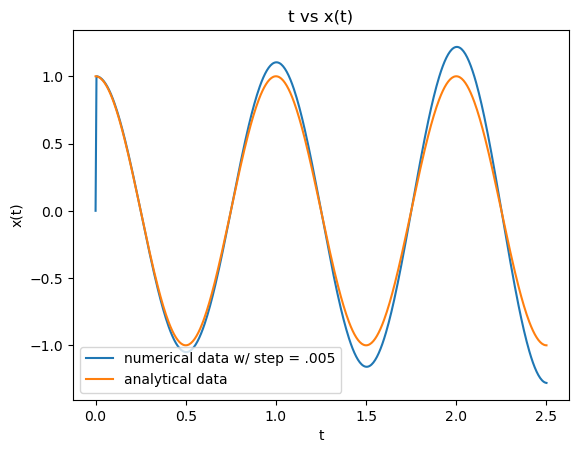

In [397]:
points4 = euler_method(second_order_test_func, np.array([1, 0]), .005, 500)
t_vals_4 = [point[0] for point in points4]
f_vals_2 = [point[1][0] for point in points4]

## generating data for analytical solution f(t) = cos(2pit)
soln_f_val_2 = np.zeros(501)
for i in range(501):
    t = i * .005
    soln_f_val_2[i] = np.cos(2 * np.pi * t)
    
plt.plot(t_vals_4, f_vals_2, label = "numerical data w/ step = .005")
plt.plot(t_vals_4, soln_f_val_2, label = "analytical data")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("t vs x(t)")
plt.legend()

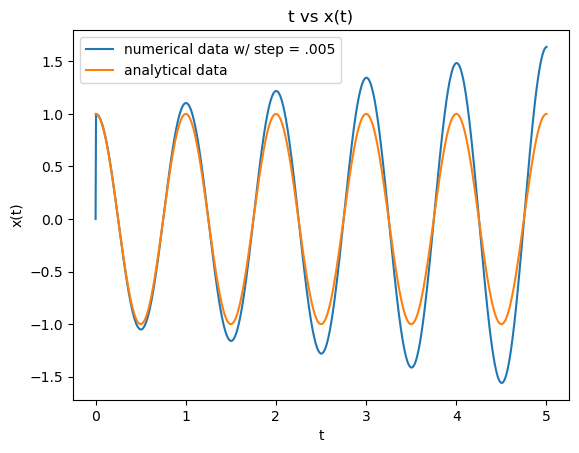

In [398]:
points5 = euler_method(second_order_test_func, np.array([1, 0]), .005, 1000)
t_vals_5 = [point[0] for point in points5]
f_vals_3 = [point[1][0] for point in points5]

## generating data for analytical solution f(t) = cos(2pit)
soln_f_val_3 = np.zeros(1001)
for i in range(1001):
    t = i * .005
    soln_f_val_3[i] = np.cos(2 * np.pi * t)
    
plt.plot(t_vals_5, f_vals_3, label = "numerical data w/ step = .005")
plt.plot(t_vals_5, soln_f_val_3, label = "analytical data")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("t vs x(t)")
plt.legend()

I can confirm that what we expect can be observed from these graphs

### Growth Correction

<font color = blue>
Add an artificial damping term to the original differential equation so that we have

$$
\frac{d^2x}{dt^2} = -4\pi^2x - 2\beta\frac{dx}{dt}
$$

as our differential equation.  Use the same initial conditions as in the previous section, and set $\Delta t = .01$ and $N = 500$.  Choose the value of $\beta$ so that the damping cancels out the parasitic growth of the numerical solution.  (Explain your choice as a **discussion**).  Again plot the result against the analytic solution -- not to this differential equation but to the original equation studied above.

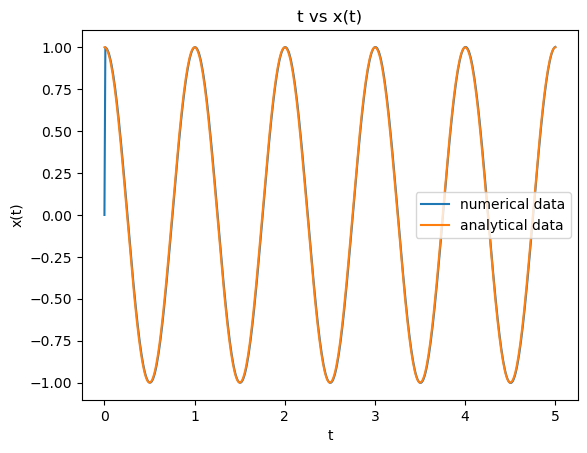

In [402]:
def second_order_with_damping(f, t, B = .197):
    """
    Second order Test differential equation for euler method function
    f : vector (x, v)
    t : time variable
    B : constant that controls damping
    """
    return [f[1], -4 * np.pi**2 * f[0] - 2 * B * f[1]]

points6 = euler_method(second_order_with_damping, np.array([1, 0]), .01, 500)
t_vals_6 = [point[0] for point in points6]
f_vals_6 = [point[1][0] for point in points6]

## generating data for analytical solution f(t) = cos(2pit)
soln_f_val_4 = np.zeros(501)
for i in range(501):
    soln_f_val_4[i] = np.cos(2 * np.pi * t_vals_6[i])
    
plt.plot(t_vals_6, f_vals_6, label = "numerical data")
plt.plot(t_vals_6, soln_f_val_4, label = "analytical data")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("t vs x(t)")
plt.legend()

to choose the value of $\beta$ I remembered the damped SHO example from class where we knew $m\frac{d^2x}{dt^2} = -kx - b\frac{dx}{dt}$ where $w = \sqrt{\frac{k}{m}}$ and $2\beta = \frac{b}{m}$. All of this being said, we found that the anti damping parameter = $\frac{\omega^2\Delta t}{2}$. Solving this using $\omega^2 = \frac{k}{m} = 4\pi^2$ we get $\beta = 2\pi^2 * .01 \approx .197$.

In the graph, we can see (or believe) that there appears to only be one curve despite the fact that there are two because they look so identical.

## The Pendulum

<font color = blue>
Consider the system (which does not have an analytic solution)

$$
\frac{d^2\theta}{dt^2} = -\sin\theta - 2\beta\dot{\theta}
$$

which represents a pendulum with a damping term.  (The system has been suitably non-dimensionalized, so that the dimensionful fator $\frac{g}{\ell}$ which would usually appear in front of the $\sin\theta$ has been absorbed into a redefinition of time.  The damping factor $\beta$ has also been rescaled to be dimensionless.)  We are actually interested in the simple pendulum without the damping term, but as in the previous section, we will need to introduce an artificial damping term to counteract the parasitic numerical growth.

In [406]:
def pendulum(f, t, B = 0):
    """
    represents the second order ODE of a pendulum with a damping term that is 
    non dimensionalized

    f : vector (theta, theta_prime)
    t : time variable
    """
    return [f[1], -np.sin(f[0]) - (2 * B * f[1])]

### * Growth

<font color = blue>
    
First attempt to solve the system numerically with $\beta = 0$, using initial conditions $\theta_0 = 1$ and $\dot{\theta}_0 = 0$.  Confirm that, as usual, we obtain un-physical growth of the solution.  Use $\Delta t = 0.01$ and $N = 30000$.  Graph your results, and include horizontal lines at $\theta = \pm \pi$.  in a **discussion**, explain what happens around $t = 270$  (Hint: think about the possible ways in which a rigid rod pendulum can move.)

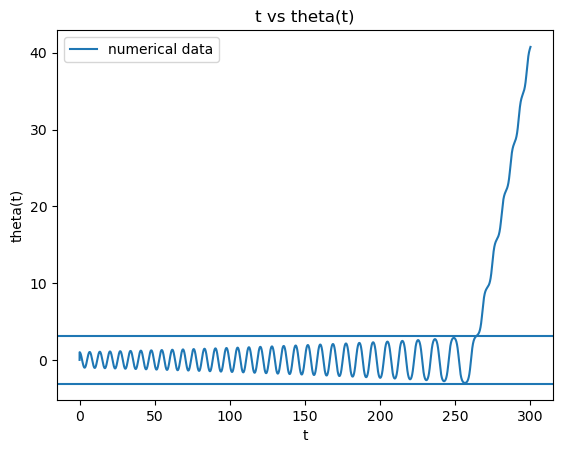

In [409]:
results = euler_method(pendulum, np.array([1, 0]), .01, 30000)
t_vals = [point[0] for point in results]
f_vals = [point[1][0] for point in results]

## generating data for analytical solution f(t) = cos(2pit)
# soln_f_val_4 = np.zeros(501)
# for i in range(501):
#     soln_f_val_4[i] = np.cos(2 * np.pi * t_vals_6[i])
    
plt.plot(t_vals, f_vals, label = "numerical data")
# plt.plot(t_vals_6, soln_f_val_4, label = "analytical data")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.title("t vs theta(t)")
plt.axhline(-np.pi)
plt.axhline(np.pi)
plt.legend()

At t $\approx$ 270 we can see that the theta(t) value spikes up from between the $\pm \pi$ bounds and catapults up to much higher values. I believe that this happens because the pendulum (as the euler method sees it) is thought to keep spinning in the same direction faster and faster and faster hence causing it to stop changing directions.

### Correction

<font color = blue>
Determine (by trial and error) a value $\beta$ that, when used in the damped pendulum differential equation ends up canceling out the numerical growth exactly so that we obtain a numerical solution that is something like an "undamped pendulum".  Use the same initial conditions as in the previous part.

Then, use the initial conditions $\theta_0 = 0.5$ and $\dot{\theta}_0 = 0$, and repeat the exercise.  **Discuss** the results of this analysis.

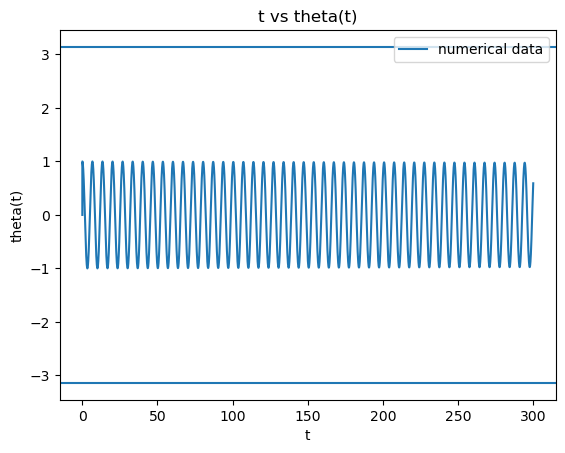

In [413]:
def pendulum(f, t, B = .0045):
    """
    represents the second order ODE of a pendulum with a damping term that is 
    non dimensionalized

    f : vector (theta, theta_prime)
    t : time variable
    """
    return [f[1], -np.sin(f[0]) - (2 * B * f[1])]

results = euler_method(pendulum, np.array([1, 0]), .01, 30000)
t_vals = [point[0] for point in results]
f_vals = [point[1][0] for point in results]

## generating data for analytical solution f(t) = cos(2pit)
# soln_f_val_4 = np.zeros(501)
# for i in range(501):
#     soln_f_val_4[i] = np.cos(2 * np.pi * t_vals_6[i])
    
plt.plot(t_vals, f_vals, label = "numerical data")
# plt.plot(t_vals_6, soln_f_val_4, label = "analytical data")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.title("t vs theta(t)")
plt.axhline(-np.pi)
plt.axhline(np.pi)
plt.legend()

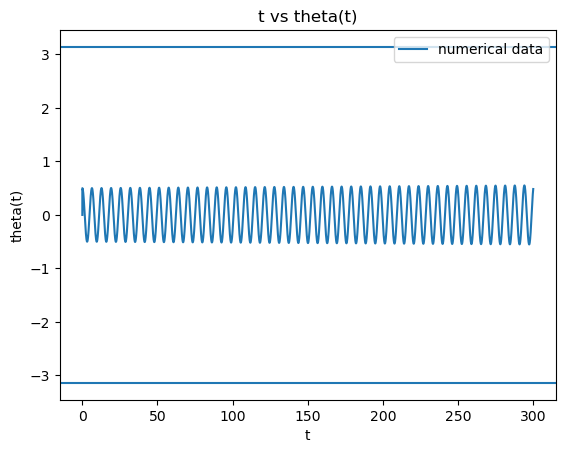

In [414]:
def pendulum(f, t, B = .0045):
    """
    represents the second order ODE of a pendulum with a damping term that is 
    non dimensionalized

    f : vector (theta, theta_prime)
    t : time variable
    """
    return [f[1], -np.sin(f[0]) - (2 * B * f[1])]

results = euler_method(pendulum, np.array([.5, 0]), .01, 30000)
t_vals = [point[0] for point in results]
f_vals = [point[1][0] for point in results]

## generating data for analytical solution f(t) = cos(2pit)
# soln_f_val_4 = np.zeros(501)
# for i in range(501):
#     soln_f_val_4[i] = np.cos(2 * np.pi * t_vals_6[i])
    
plt.plot(t_vals, f_vals, label = "numerical data")
# plt.plot(t_vals_6, soln_f_val_4, label = "analytical data")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.title("t vs theta(t)")
plt.axhline(-np.pi)
plt.axhline(np.pi)
plt.legend()

I found that the optimal (or as close to it as I could find) $\beta$ value was $\approx .0045$. The way that I did my trial and error, was by halving my inputted values until I knew I was in the right ballpark. Once I was in the right ballpark I continuously tried different values until I felt that the slope of the line that travelled from peak to peak was = 0. The resulting graphs, with my B values look as close to sinusoidal as I could manage to get them.

## The Verlet Function

<font color = blue>
The Verlet method is designed to solve a second order differential equation, in the form

$$
\frac{d^2x}{dt^2} = F(x, \dot{x}, t)
$$

### Basic Code

<font color = blue>
    
Create a function that will implement the Verlet method.  Your code should input a `function` in the form $F(x, v, t)$, initial conditions `x_initial` and `v_initial`, a `step_size` and a total `step_count` = $N$.  It should output a pair of arrays, each of $N + 1$ elements: times $\{t_n\}$ and positions $\{x_n\}$.

In [420]:
def verlet(function, x_initial, v_initial, step_size, step_count):
    """
    implementation of the verlet second order derivative method
    function : function in the form F(x, v, t) which models the force
    x_initial : initial condition x_o (position)
    v_initial : initial condition v_o (velocity)
    step_size : the size of the "steps" we are taking (delta_t)
    step_count : the total number of steps we will take
    
    returns : array of x _values and array of t_values (size 2 tuple)
    """
    x_neg = x_initial - (v_initial * step_size)
    x_values = np.zeros(step_count + 1)
    t_values = np.arange(0, ((step_size * step_count) + step_size), step_size)
    x_values[0] = x_neg
    x_values[1] = x_initial
    v_current = v_initial
    for i in range(step_count - 1):
        x_values[i + 2] = (2 * x_values[i + 1]) - x_values[i] + (function(x_values[i + 1], v_current, (step_size * (i + 1))) * step_size**2)
        v_current = (x_values[i + 2] - x_values[i + 1])/(step_size)
    return x_values, t_values

### Testing the Code

<font color = blue>
Test your code using the (dimensionless) equation for relativistic motion with a constant force:

$$
\frac{d^2x}{dt^2} = \left(1 - \left(\frac{dx}{dt}\right)^2\right)^{3/2}
$$

Have the particle begin at rest, at the origin, use a step size $0.01$, and take $N = 1000$ total steps.  Show the results together with a plot of the theoretical particle trajectory, which is

$$
x(t) = \sqrt{1 + t^2} - 1
$$

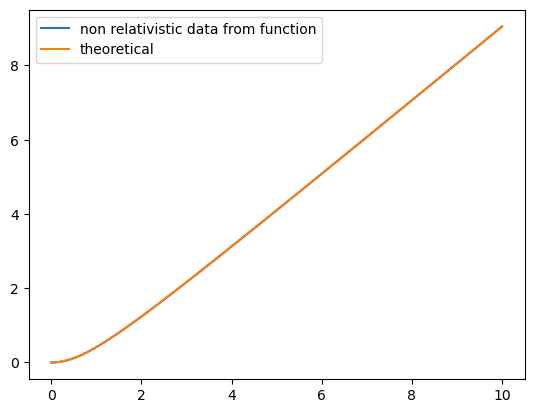

In [423]:
def rel_motion_const_force(s, s_deriv, tau):
    """
    function modeling the relative motion with a constant force
    
    s : dimensionless position (xw/c)
    s_deriv : dimensionless velocity (derivative of s)
    tau : dimensionless time scale (tw)
    
    returns the acceleration of the system
    """
    return (1 - ((s_deriv)**2))**(1.5)

x_t, t_values = verlet(rel_motion_const_force, 0, 0, .01, 1000)

theoretical_x_t = np.zeros(len(t_values))
# theoretical patricle trajectory data generation
for i in range(1000 + 1):
    theoretical_x_t[i] = np.sqrt(1 + (t_values[i]**2)) - 1

plt.plot(t_values, x_t, label = "non relativistic data from function")
plt.plot(t_values, theoretical_x_t, label = "theoretical")
plt.legend()

### Discrepancies

<font color = blue>
    
A more effective way to examine way to examine the accuracy of a numerical method is to compute discrepancies.  Using the theoretical trajectory, compute the differences between the theoretical positions and the numerical positions.  Do this for a step size of $0.01$ and $N = 1000$ total steps.  Then, repeat the process, using a step size of $0.001$ and $N = 10000$ total steps.  Display both results together on a plot, and **discuss** the results.

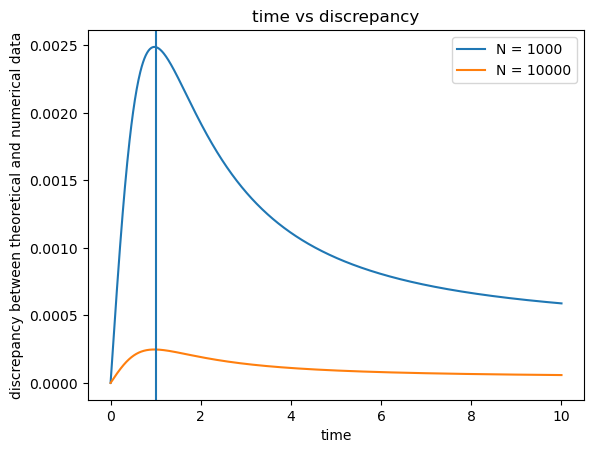

In [426]:
N = 1000
x_t, t_values = verlet(rel_motion_const_force, 0, 0, .01, N)
discrepancies = np.zeros(N + 1)

theoretical_x_t = np.zeros(len(t_values))
# theoretical patricle trajectory data generation
for i in range(N + 1):
    theoretical_x_t[i] = np.sqrt(1 + (t_values[i]**2)) - 1
    
for i in range(N + 1):
    discrepancies[i] = abs(theoretical_x_t[i] - x_t[i])
    
N2 = 10000
x_t2, t_values2 = verlet(rel_motion_const_force, 0, 0, .001, N2)
discrepancies2 = np.zeros(N2 + 1)

theoretical_x_t2 = np.zeros(len(t_values2))
# theoretical patricle trajectory data generation
for i in range(N2 + 1):
    theoretical_x_t2[i] = np.sqrt(1 + (t_values2[i]**2)) - 1
    
for i in range(N2 + 1):
    discrepancies2[i] = abs(theoretical_x_t2[i] - x_t2[i])
    
plt.plot(t_values, discrepancies, label = "N = 1000")
plt.plot(t_values2, discrepancies2, label = "N = 10000")
plt.axvline(1)
plt.xlabel("time")
plt.ylabel("discrepancy between theoretical and numerical data")
plt.title("time vs discrepancy")
plt.legend()

We can see from the graph of both of the discrepancies that the N = 10000 discrepancies are much lower in all cases than the N = 1000 discrepancies. This happens because we know that the error scales with the size of the steps (delta_t) so therefore with smaller step sizes the discrepancies decrease. Another interesting thing that we can see in the graph is that the largest error occurs very close to T = 1 in both cases (N = 1000 and 10000). The source of this maximum seems to be an issue with the approximation of dx/dt which we know is not very accurate especially at t = 1. This error in velocity then translates to an error in the value of the function at that velocity.

## * Relativistic Springs

<font color = blue>
The differential equation for the relativistic spring (in dimensionless form) is

$$
\ddot{x} = -x(1 - \dot{x}^2)^{3/2}
$$

### Non-Relativistic Limit

<font color = blue>
    
Create a plopt showing position vs. time in the relativistic spring system for the initial conditions $v_0 = 0$, $x_0 = .01$, together with a plot of the *non-relativistic* analytic result.  Use a time step of $0.001$, and $N = 100000$ total steps.  **Discuss** the results

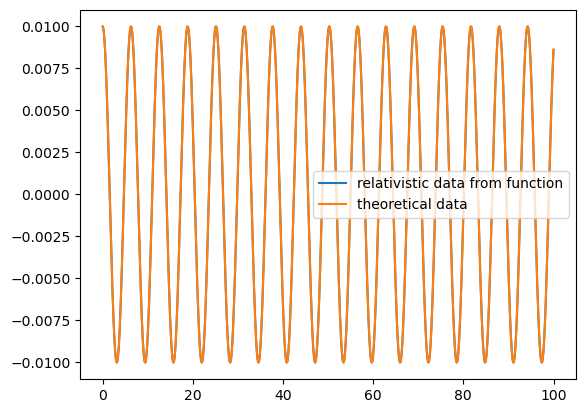

In [432]:
def rel_spring(x, v, t):
    """
    The differential equation for the relativistic spring in dimensionless form
    
    x : dimensionless position variable
    v : dimensionless velocity variable
    t : dimensionless time scale
    
    returns : the acceleration of the relativistic spring
    """
    return -x * ((1 - v**2)**(3/2))

x_t, t_values = verlet(rel_spring, .01, 0, .001, 100000)

## Non relativistic spring data generation
def non_rel_spring(alpha, tau):
    """
    non relativistic spring function
    
    alpha : starting position (dimensionless)
    tau : dimensionless time variable
    
    returns : the position of the non relativistic spring (dimensionless)
    """
    return alpha * np.cos(tau)
    
theoretical_x_t = np.zeros(100000 + 1)
for i in range(100000 + 1):
    theoretical_x_t[i] = non_rel_spring(.01, t_values[i])

plt.plot(t_values, x_t, label = "relativistic data from function")
plt.plot(t_values, theoretical_x_t, label = "theoretical data")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("t vs x(t)")
plt.legend()

in these results, we can see that the relativistic data from the function and the theoretical data are almost identical. We know that this makes sense because of the fact that relativity plays a very small role in this story. Relativity plays a small role in this story because in this case we don't stretch the spring out very far initially.

### Highly Relativistic Limit

<font color = blue>
    
Now create a plot of position vs. time with the initial conditions $v_0 = 0$ and $x_0 = 10.0$.  In this case your don't have to display the extreme relativistic limit on the plot (creating a triangle wave is a little annoying), but do show a vertical line at one "extreme relativistic period".  **Discuss** the results (and explain the calculation of the period).

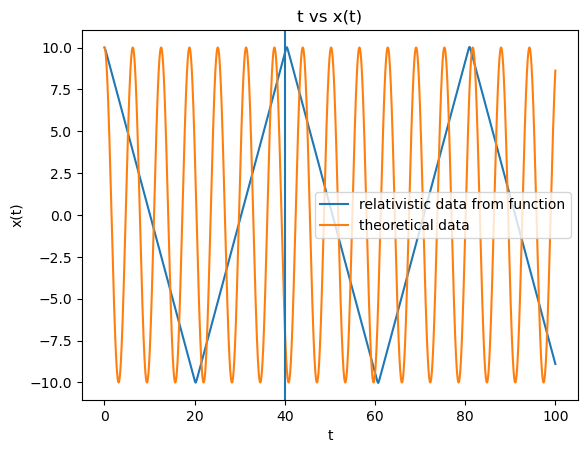

In [465]:
x_t, t_values = verlet(rel_spring, 10, 0, .001, 100000)

theoretical_x_t = np.zeros(100000 + 1)
for i in range(100000 + 1):
    theoretical_x_t[i] = non_rel_spring(10, t_values[i])

plt.plot(t_values, x_t, label = "relativistic data from function")
plt.plot(t_values, theoretical_x_t, label = "theoretical data")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("t vs x(t)")
plt.axvline(4 * 10)
plt.legend()

In these results it is clear to see a couple of things. Firstly, the relativistic data from our function is clearly much different than the classical theoretical data. Another thing to notice is that the clope of the line is very close to (approaching as x_initial grows) $\pm 1$. Another thing to notice is that the period of the wave is roughly 4 times the initial x position which it is also approaching as the initial x position increases. 

### Multiple Position Graphs

<font color = blue>
    
Now create a single graph which include multiple different initial conditions: use $v_0 = 0$, but $x_0 \in \{0.1, 0.5, 1.0, 5.0, 10.0\}$.  **Discuss** the results.

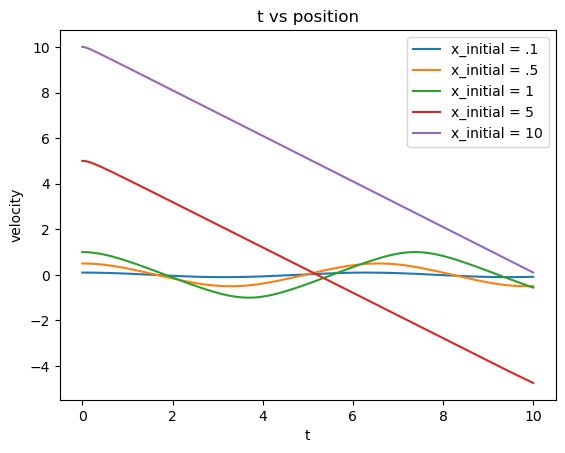

In [483]:
N = 10000
x_initial_values = [.1, .5, 1, 5, 10]
x_t_values = np.array([np.zeros(N + 1), np.zeros(N + 1), np.zeros(N + 1), np.zeros(N + 1), np.zeros(N + 1)])
multiple_t_values = np.array([np.zeros(N + 1), np.zeros(N + 1), np.zeros(N + 1), np.zeros(N + 1), np.zeros(N + 1)])

i = 0
for item in x_initial_values:
    x_t_values[i], multiple_t_values[i] = x_t, t_values = verlet(rel_spring, x_initial_values[i], 0, .001, N)
    i += 1

plt.plot(multiple_t_values[0], x_t_values[0], label = "x_initial = .1")
plt.plot(multiple_t_values[1], x_t_values[1], label = "x_initial = .5")
plt.plot(multiple_t_values[2], x_t_values[2], label = "x_initial = 1")
plt.plot(multiple_t_values[3], x_t_values[3], label = "x_initial = 5")
plt.plot(multiple_t_values[4], x_t_values[4], label = "x_initial = 10")
plt.xlabel("t")
plt.ylabel("velocity")
plt.title("t vs position")
plt.legend()

we can see that firstly, the extremes of the slopes of each of the lines increases as x initial increases. We can also see that the lower x initial values complete multiple oscillations whereas the two highest x initial curves only begin their first oscillation.

### Velocity Graphs

<font color = blue>
    
Use the lists of positions and times that you have just created to generate lists of velocities.  Create a single plot of these.  **Discuss** the results.

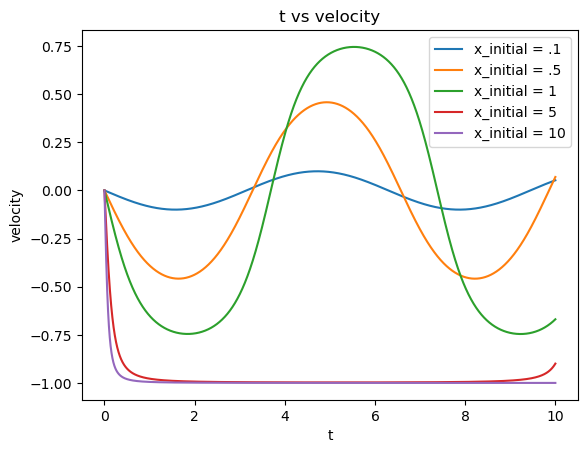

In [485]:
velocity_lists = np.array([np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)])

for i in range(len(x_t_values)):
    for j in range(N):
        velocity_lists[i][j] = (x_t_values[i][j + 1] - x_t_values[i][j]) / (multiple_t_values[i][j + 1] - multiple_t_values[i][j])

plt.plot(multiple_t_values[0][:-1], velocity_lists[0], label = "x_initial = .1")
plt.plot(multiple_t_values[1][:-1], velocity_lists[1], label = "x_initial = .5")
plt.plot(multiple_t_values[2][:-1], velocity_lists[2], label = "x_initial = 1")
plt.plot(multiple_t_values[3][:-1], velocity_lists[3], label = "x_initial = 5")
plt.plot(multiple_t_values[4][:-1], velocity_lists[4], label = "x_initial = 10")
plt.xlabel("t")
plt.ylabel("velocity")
plt.title("t vs velocity")
plt.legend()

In these results, it is clear to see that the two curves with the largest x initial values approach -1 velocity very quickly and we can see that the slope of the curves with that becomes 0 telling us that the acceleration approaches 0 as the time goes on (and the particle approaches the speed of light). In the other three curves we see that as the x_initial decreases, the curves become much less extreme because their velocity and acceleration are smaller (extremes are inversely proportional to x intial value).

## Any Other Problem

<font color = blue>
Come up with a physics problem (different from the ones analyzed above) that you can use the Verlet method to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.  

For my own problem I decided to choose a system modeling the height of a projectile with air resistance. The goal of ths problem is to find the y(t) function that models the height of the projectile over time. Using this function I am to find how long the projectile was in the air before hitting the ground.

Specifically, with this problem I want to find out how fast a baseball would be going if I threw it off of the eiffel tower onto someones head (300 meters tall). I want to also test whether it would be better for the person below me if I threw it straight up or straight down at them?

Equation : $m\frac{d^2y}{dt^2} = -mg - b\frac{dy}{dt}$

The baseball would be travelling ~34.52510501550913


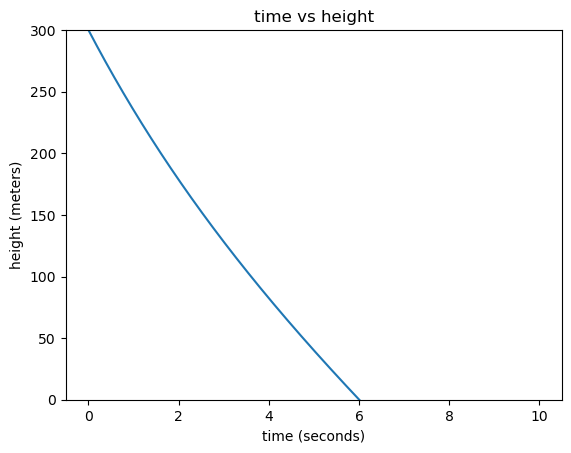

In [507]:
def projectile_height_with_drag(y, y_deriv, t, beta = .3):
    """
    The differential equation for the height of a projectile with drag force
    
    y : height variable meters
    y_deriv : velocity in the y direction m/s
    t : time scale seconds
    beta : the drag coefficient b / m (using .3 to simulate a baseball)
    
    returns : the acceleration of the projectile in the y direction
    """
    return - 9.8 - (beta * y_deriv)

# v initial = 70 mph = 31.3 m/s (how fast I can throw a baseball)
# y initial = 300 meters
y_t, t_vals = verlet(projectile_height_with_drag, 300, -70, .001, 10000)
plt.plot(t_vals, y_t)
plt.ylim(0, 300)
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.title("time vs height")
print(f"The baseball would be travelling ~{(y_t[-2] - y_t[-1])/(t_vals[-1] - t_vals[-2])} meters per second or ~77 mph (not very fast)")

The baseball would be travelling ~32.66666628754001 meters per second or ~77 mph (not very fast)


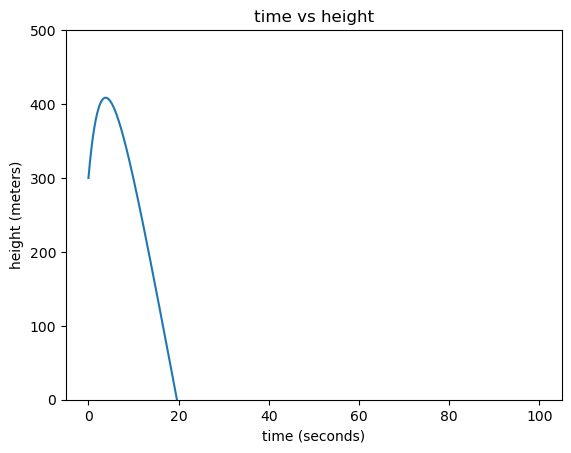

In [519]:
y_t, t_vals = verlet(projectile_height_with_drag, 300, 70, .001, 100000)
plt.plot(t_vals, y_t)
plt.ylim(0, 500)
plt.xlabel("time (seconds)")
plt.ylabel("height (meters)")
plt.title("time vs height")
print(f"The baseball would be travelling ~{(y_t[-2] - y_t[-1])/(t_vals[-1] - t_vals[-2])} meters per second or ~73 mph (even slower)")

As we can see from the results above, firstly, the ball never reaches a speed that is very significant at all! I would have been better just throwing the ball at them in the first place. Secondly, we found at that it takes more than three times the time for the ball to reach the ground if I throw it straight up then if I throw it straight down. lastly we found that the best way to go about not killing the person below me (although neither of the speeds would do that) would be to throw the ball straight up instead of straight down at them (shocker).